## Movie Data Anlaysis & Recommendations

Dataset from https://www.kaggle.com/shivamb/netflix-shows/version/3

In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [321]:
%matplotlib inline
plt.style.use('seaborn-pastel')

Read the data from kaggle containing information about Netflix content.

In [322]:
raw_data = pd.read_csv('netflix_titles.csv', index_col="show_id")
raw_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


There are 6234 shows and 12 columns. 
Missing data from director, cast, country, data_added, release_year, rating

In [323]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6234 entries, 81145628 to 70153404
Data columns (total 11 columns):
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(1), object(10)
memory usage: 584.4+ KB


Check that the show_id is unique

In [324]:
len(raw_data) == len(raw_data.index.unique())

True

There are movies and TV shows in the dataset. Rename TV shows to remove space.

In [325]:
raw_data.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [326]:
raw_data["type"].replace({"TV Show" : "TVShow"}, inplace=True);

There are about twice as many movies as TV shows. Note that each TV Show could have multiple Seasons (see duration column) and has multiple episodes.

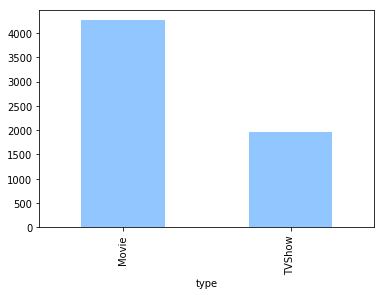

In [327]:
raw_data.groupby("type")["title"].count().plot(kind="bar")

In [328]:
raw_data[raw_data.type== "TVShow"].sort_values("title")

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
80234414,TVShow,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",2017,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist..."
80098046,TVShow,12 Years Promise,NaN,"So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui ...",South Korea,"May 22, 2017",2014,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A pregnant teen is forced by her family to lea...
80117470,TVShow,13 Reasons Why,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,"August 23, 2019",2019,TV-MA,3 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","After a teenage girl's perplexing suicide, a c..."
80996791,TVShow,13 Reasons Why: Beyond the Reasons,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,"August 23, 2019",2019,TV-MA,3 Seasons,"Crime TV Shows, Docuseries","Cast members, writers, producers and mental he..."
80205593,TVShow,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
80991872,TVShow,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
80175913,TVShow,20 Minutes,NaN,"Tuba Büyüküstün, Ilker Aksum, Bülent Emin Yara...",Turkey,"August 15, 2017",2013,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","When his wife is convicted of murder, a horrif..."
80212701,TVShow,21 Sarfarosh: Saragarhi 1897,NaN,"Luke Kenny, Mohit Raina, Mukul Dev",India,"December 1, 2018",2018,TV-14,1 Season,"International TV Shows, TV Dramas","In one of history's greatest last stands, a ba..."
80215076,TVShow,21 Thunder,NaN,"Stephanie Bennett, Emmanuel Kabongo, RJ Fether...",Canada,"March 1, 2018",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Players and coaches for a Montreal soccer team...


There are a few (11) duplicated TV Shows. Could have been re-made for a different region.
Could have difference between live action vs anime (Kakegurui). We are going to leave them as-is. No TV show appears more than twice in the dataset. 

In [329]:
len(raw_data[raw_data.type== "TVShow"]["title"])-len(raw_data[raw_data.type== "TVShow"]["title"].unique())

11

In [330]:
[item for item in  Counter(raw_data[raw_data.type== "TVShow"]["title"]).items() if item[1]>1]

[('Lovesick', 2),
 ('Maniac', 2),
 ('Top Boy', 2),
 ('Life', 2),
 ('Tunnel', 2),
 ('The Code', 2),
 ('Oh My Ghost', 2),
 ('Charmed', 2),
 ('Persona', 2),
 ('Rosario Tijeras', 2),
 ('Kakegurui', 2)]

In [331]:
raw_data[raw_data.title =="Kakegurui"]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
80175351,TVShow,Kakegurui,NaN,"Saori Hayami, Minami Tanaka, Tatsuya Tokutake,...",Japan,"June 13, 2019",2019,TV-14,2 Seasons,"Anime Series, International TV Shows, TV Thril...",High roller Yumeko Jabami plans to clean house...
80233218,TVShow,Kakegurui,NaN,"Minami Hamabe, Mahiro Takasugi, Aoi Morikawa",Japan,"July 4, 2019",2019,TV-14,2 Seasons,"International TV Shows, TV Dramas, TV Thrillers",Yumeko Jabami enrolls at Hyakkaou Private Acad...


There are a also few (24) duplicated movies. Leave them as-is. No Movie title appears more than twice in the dataset.

In [332]:
len(raw_data[raw_data.type== "Movie"]["title"])-len(raw_data[raw_data.type== "Movie"]["title"].unique())

24

In [333]:
[item for item in  Counter(raw_data[raw_data.type== "Movie"]["title"]).items() if item[1]>1]

[('Love', 2),
 ('One Day', 2),
 ('The Outsider', 2),
 ('The Secret', 2),
 ('The Saint', 2),
 ('Limitless', 2),
 ('The Birth Reborn', 2),
 ('Tiger', 2),
 ('We Are Family', 2),
 ('The Lovers', 2),
 ('Drive', 2),
 ('Benji', 2),
 ('Blood Money', 2),
 ('Sarkar', 2),
 ('Solo', 2),
 ('The Silence', 3),
 ('Us and Them', 2),
 ('Carrie', 2),
 ('Prince', 2),
 ('Zoom', 2),
 ('People You May Know', 2),
 ('Don', 2),
 ('Frank and Cindy', 2)]

In [334]:
raw_data[raw_data.title =="One Day"]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81016045,Movie,One Day,Banjong Pisanthanakun,"Chantavit Dhanasevi, Nittha Jirayungyurn, Thee...",Thailand,"September 5, 2018",2016,TV-PG,135 min,"Dramas, International Movies, Romantic Movies",When his colleague (and crush) temporarily los...
70184051,Movie,One Day,Lone Scherfig,"Rafe Spall, Jim Sturgess, Ken Stott, Jodie Whi...","United States, United Kingdom","December 16, 2018",2011,PG-13,107 min,"Dramas, Romantic Movies","After a brief college romance, Emma and Dexter..."


In [335]:
def values_from_list_of_list(series):
    """returns all the values (non-N/A) from a list of list containing strings.

    Args:
     series (pandas Series): The data (string).

    Returns:
        list: the individual values from the series
    
    Notes:
        Has trouble with nan data types. Filter before use
    """
    raw = series.str.split(",").tolist()
    values = [item for row in raw for item in row if item != "N/A"]
    return values
    

There are many missing directors and cast members. Fill missing values with N/A. Alternatively could filter them out before using values_from_list_of_list.


In [336]:
print(f"There are {raw_data.director.isnull().sum()} rows missing directors.")
print(f"There are {raw_data.cast.isnull().sum()} rows missing cast members.")

There are 1969 rows missing directors.
There are 570 rows missing cast members.


In [337]:
raw_data.director.fillna("N/A", inplace=True)
raw_data.cast.fillna("N/A", inplace=True)
raw_data.country.fillna("N/A", inplace=True)
raw_data.listed_in.fillna("N/A", inplace=True)

In [338]:
#Get a list of all the unique directors
directors = values_from_list_of_list(raw_data.director)

unique_directors = list(set(directors))
print(f"There are {len(unique_directors)} unique directors.")

There are 3736 unique directors.


The 10 most common directors are listed below along with the count of shows. The dataset is filtered for the top Director Rual Campos.

In [339]:
#Most Common Directors
Counter(directors).most_common(10)

[('Raúl Campos', 18),
 (' Jan Suter', 18),
 ('Jay Karas', 14),
 ('Marcus Raboy', 14),
 ('Jay Chapman', 12),
 ('Martin Scorsese', 9),
 ('Steven Spielberg', 9),
 ('Shannon Hartman', 8),
 ('Lance Bangs', 8),
 ('David Dhawan', 8)]

In [340]:
raw_data[raw_data['director'].str.contains("Raúl Campos")]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
80124725,Movie,Carlos Ballarta: El amor es de putos,"Jan Suter, Raúl Campos Delgado",Carlos Ballarta,Mexico,"November 21, 2016",2016,TV-MA,67 min,Stand-Up Comedy,"Carlos Ballarta mocks daily life in Mexico, in..."
80183088,Movie,Mea Culpa,"Raúl Campos, Jan Suter",Alexis de Anda,Mexico,"November 10, 2017",2017,TV-MA,54 min,Stand-Up Comedy,"Raw and outspoken, comedian Alexis de Anda bar..."
80124727,Movie,Simplemente Manu NNa,"Jan Suter, Raúl Campos",Manu NNa,Mexico,"May 5, 2017",2017,TV-MA,72 min,Stand-Up Comedy,Eclectic stand-up comic Manu NNa relays everyd...
80192137,Movie,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Fernando Sanjiao,Argentina,"May 25, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...
80192065,Movie,Carlos Ballarta: Furia Ñera,"Raúl Campos, Jan Suter",Carlos Ballarta,Mexico,"May 11, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...
80183197,Movie,Sofía Niño de Rivera: Selección Natural,"Raúl Campos, Jan Suter",Sofía Niño de Rivera,Mexico,"March 30, 2018",2018,TV-MA,62 min,Stand-Up Comedy,Mexico's Sofía Niño de Rivera brings her dark ...
80192139,Movie,Malena Pichot: Estupidez compleja,"Raúl Campos, Jan Suter",Malena Pichot,Argentina,"March 2, 2018",2018,TV-MA,51 min,Stand-Up Comedy,An Argentine comedian espouses the values of f...
80192063,Movie,Natalia Valdebenito: El especial,"Raúl Campos, Jan Suter",Natalia Valdebenito,Chile,"March 2, 2018",2018,TV-MA,69 min,Stand-Up Comedy,A Chilean comedian fuses activism with irrever...
80191989,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Jani Dueñas,Chile,"June 29, 2018",2018,TV-MA,77 min,Stand-Up Comedy,Chilean comedian and personality Jani Dueñas p...


In [341]:
#Get a list of all the unique cast members
cast = values_from_list_of_list(raw_data.cast)
unique_cast = list(set(cast))
print(f"There are {len(unique_cast)} unique cast members.")

There are 29378 unique cast members.


The 10 most common actors/actresses are listed below along with the count of shows. The dataset is filtered for the top Actor Anupam Kher.

In [342]:
#Most Common Cast Members
Counter(cast).most_common(10)

[(' Anupam Kher', 30),
 (' Om Puri', 25),
 (' Takahiro Sakurai', 24),
 ('Shah Rukh Khan', 24),
 (' Boman Irani', 23),
 (' Yuki Kaji', 22),
 (' Andrea Libman', 22),
 (' Paresh Rawal', 22),
 ('Akshay Kumar', 19),
 (' John Cleese', 18)]

In [343]:
raw_data[raw_data['cast'].str.contains("Anupam Kher")]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
70123119,Movie,Wake Up Sid,Ayaan Mukherji,"Ranbir Kapoor, Konkona Sen Sharma, Shruti Bapn...",India,"October 1, 2018",2009,TV-14,132 min,"Comedies, International Movies, Romantic Movies",A spoiled trust fund brat finds himself stuck ...
70107499,Movie,A Wednesday,Neeraj Pandey,"Anupam Kher, Naseeruddin Shah, Jimmy Shergill,...",India,"November 1, 2018",2008,TV-MA,103 min,"Action & Adventure, Dramas, International Movies","After receiving an anonymous tip about a bomb,..."
70185141,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",2011,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp..."
70109249,Movie,C Kkompany,Sachin Yardi,"Mahesh Bhatt, Mithun Chakraborty, G.K. Desai, ...",India,"May 31, 2019",2008,TV-14,127 min,"Action & Adventure, Comedies, International Mo...","To blow off some steam, friends Akshay, Joshi ..."
60021906,Movie,Kyo Kii... Main Jhuth Nahin Bolta,David Dhawan,"Govinda, Mohnish Bahl, Sharad Kapoor, Satish K...",India,"May 16, 2019",2001,TV-PG,150 min,"Comedies, International Movies, Sci-Fi & Fantasy",The life and career of a lawyer are thrown int...
70035357,Movie,Kyaa Kool Hai Hum,Sangeeth Sivan,"Tusshar Kapoor, Riteish Deshmukh, Isha Koppika...",India,"May 15, 2019",2005,TV-14,165 min,"Comedies, International Movies, Music & Musicals",Longtime friends Rahul and Karan head to Mumba...
80243408,Movie,Aiyaary,Neeraj Pandey,"Sidharth Malhotra, Manoj Bajpayee, Rakul Preet...",India,"May 15, 2018",2018,TV-14,158 min,"Action & Adventure, Dramas, International Movies",When his protégé goes rogue and poses a grave ...
80158395,Movie,Chaahat,Mahesh Bhatt,"Naseeruddin Shah, Shah Rukh Khan, Pooja Bhatt,...",India,"May 1, 2017",1996,NR,148 min,"Dramas, International Movies, Romantic Movies",A vulnerable singer is forced to choose betwee...
70275774,Movie,Chashme Buddoor,David Dhawan,"Ali Zafar, Siddharth, Divyendu Sharma, Tapsee ...",India,"May 1, 2017",2013,TV-PG,121 min,"Comedies, International Movies, Music & Musicals",When pretty new neighbor Seema falls for their...


In [344]:
countries = values_from_list_of_list(raw_data.country)
unique_countries = list(set(countries))
print(f"There are {len(unique_countries)} unique countries.")

There are 173 unique countries.


The bar graph below shows the top 10 countries based on count of content.

In [345]:
#Most Common countries
top_countries = np.array(Counter(countries).most_common(10))

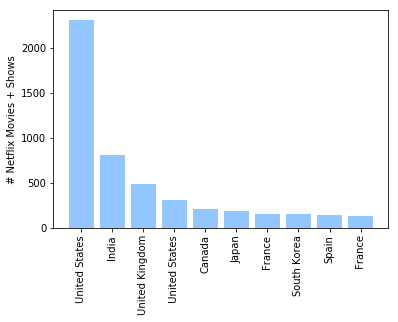

In [346]:
plt.bar(np.arange(10), top_countries[:,1].astype(int))
plt.xticks(np.arange(10), top_countries[:,0], rotation=90)
plt.ylabel("# Netflix Movies + Shows")

Drop the date added to Netflix, we would expect to see exponential growth over the years as the platform gains popularity.
Hard to see the ratio of movies : TV shows since the dataset does not have information on the release of each season and the number of episodes. We also don't have the episode duration information and can't compare total hours of content released between movies/TV shows.

In [347]:
raw_data.drop("date_added", axis=1, inplace=True)
raw_data.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
80117401,Movie,Jandino: Whatever it Takes,N/A,Jandino Asporaat,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
70234439,TVShow,Transformers Prime,N/A,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
80058654,TVShow,Transformers: Robots in Disguise,N/A,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


The TV release year is likely the last season (eg. https://en.wikipedia.org/wiki/Ripper_Street). #Most content was released in the last decade, keeping in mind the TV show cavet.

In [348]:
raw_data[(raw_data.type=="TVShow") & (~raw_data.duration.str.contains("1"))].head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,
80136796,TVShow,Show Me the Money,N/A,"Afdlin Shauki, Patrick Teoh, Mano Maniam, Rash...",N/A,2004,TV-14,2 Seasons,"International TV Shows, TV Comedies",Four ordinary family members find their lives ...
70270745,TVShow,Ripper Street,N/A,"Matthew Macfadyen, Jerome Flynn, Adam Rothenbe...","United Kingdom, Ireland",2017,TV-MA,5 Seasons,"British TV Shows, Crime TV Shows, TV Dramas",It's been six months since the last Jack the R...
70177067,TVShow,Haven,N/A,"Emily Rose, Lucas Bryant, Nicholas Campbell, E...","Canada, United States",2015,TV-14,5 Seasons,"Classic & Cult TV, TV Horror, TV Mysteries","Residents of Haven, Maine, are plagued by supe..."
80002612,TVShow,Marvel's Iron Fist,N/A,"Finn Jones, Jessica Henwick, David Wenham, Jes...",United States,2018,TV-MA,2 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas",Danny Rand resurfaces 15 years after being pre...
80095988,TVShow,Stretch Armstrong & the Flex Fighters,N/A,"Scott Menville, Steven Yeun, Ogie Banks, Wil W...",United States,2018,TV-Y7-FV,2 Seasons,Kids' TV,Jake Armstrong and his best friends are unexpe...


In [349]:
raw_data.groupby(pd.cut(raw_data.release_year, [0, 1970, 1980, 1990, 2000, 2010, 2020]))['title'].count()

release_year
(0, 1970]         44
(1970, 1980]      62
(1980, 1990]      97
(1990, 2000]     207
(2000, 2010]     743
(2010, 2020]    5081
Name: title, dtype: int64

There are many different ratings. We will consolidate them into PG, TV-14, R and nan.

type    rating  
Movie   G             36
        NC-17          2
        NR           202
        PG           183
        PG-13        286
        R            506
        TV-14       1038
        TV-G          80
        TV-MA       1348
        TV-PG        432
        TV-Y          41
        TV-Y7         69
        TV-Y7-FV      27
        UR             7
TVShow  G              1
        NR            16
        PG             1
        R              2
        TV-14        660
        TV-G          69
        TV-MA        679
        TV-PG        269
        TV-Y         102
        TV-Y7        100
        TV-Y7-FV      68
Name: title, dtype: int64


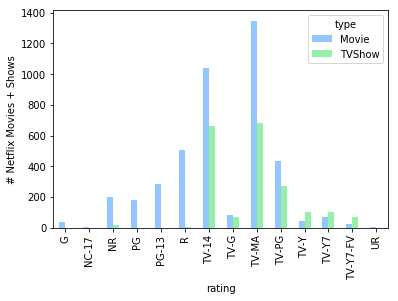

In [350]:
print(raw_data.groupby(["type", "rating"])['title'].count())
raw_data.groupby(["type", "rating"])['title'].count().unstack("type").plot(kind="bar")
plt.ylabel("# Netflix Movies + Shows")

In [351]:
raw_data["rating"].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [352]:
raw_data.rating.fillna("nan", inplace=True)
raw_data["rating"].replace(
    
    { "TV-MA" : "R", "R" : "R",  "NC-17" : "R", 
      "TV-Y" : "PG", "NR" : "nan", "TV-G" : "PG", "PG" : "PG", "TV-PG" : "PG", "G" : "PG", "TV-Y7-FV" : "PG", "TV-Y7" : "PG", 
      "UR" : "nan","nan" : "nan", "PG-13" : "TV-14", "TV-14" : "TV-14", }
    
    , inplace=True);

There are much more R rated movies copare to TV shows. Relative to the respective type of content, the distribution is much closer (40 % vs 30% for movies and tv shows respectively).

type    rating
Movie   PG         868
        R         1856
        TV-14     1324
        nan        217
TVShow  PG         610
        R          681
        TV-14      660
        nan         18
Name: title, dtype: int64


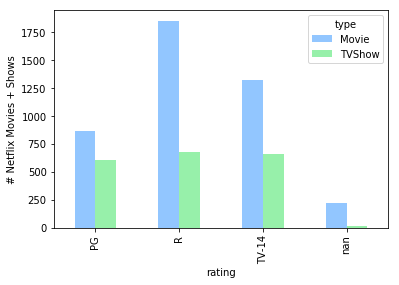

In [353]:
print(raw_data.groupby(["type", "rating"])['title'].count())
raw_data.groupby(["type", "rating"])['title'].count().unstack("type").plot(kind="bar")
plt.ylabel("# Netflix Movies + Shows")

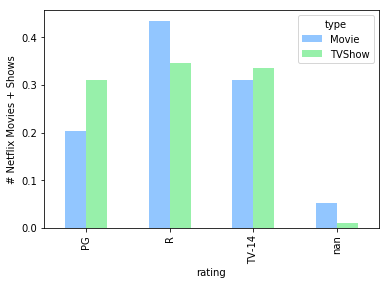

In [354]:
(raw_data.groupby(["type", "rating"])['title'].count()/raw_data.groupby(["type"])['title'].count()).unstack("type").plot(kind="bar")
plt.ylabel("# Netflix Movies + Shows")

Confirm the format of the duration column for TV shows (X Season).

In [355]:
raw_data[raw_data.type=="TVShow"].duration.str.split()

show_id
70234439      [1, Season]
80058654      [1, Season]
80163890      [1, Season]
80117902      [1, Season]
80244601      [1, Season]
80190843      [1, Season]
80221550      [1, Season]
80178151      [1, Season]
80113482      [1, Season]
80113641      [1, Season]
80996949      [1, Season]
80239337      [1, Season]
81011682      [1, Season]
80128317      [1, Season]
81027384      [1, Season]
80030186      [1, Season]
80116921      [1, Season]
80181555      [1, Season]
80184358      [1, Season]
80163293      [1, Season]
80199032      [1, Season]
80180449      [1, Season]
80201933      [1, Season]
80225885      [1, Season]
80218107      [1, Season]
80220715      [1, Season]
80241248      [1, Season]
81025403      [1, Season]
80238106      [1, Season]
81004814      [1, Season]
                ...      
70158329     [7, Seasons]
80091341     [5, Seasons]
80036747     [2, Seasons]
80173174     [2, Seasons]
80190407     [3, Seasons]
70227189     [5, Seasons]
70264078     [2, Seasons]
8023

Confrim all movie durations are in minutes

In [356]:
raw_data[raw_data.type=="Movie"]['duration'].str.contains("min").sum() == raw_data[raw_data.type=="Movie"]['duration'].count()

True

Create a new column with the number of seasons. The duration column now just has the number of mins for movies.

In [357]:
raw_data["season_count"]=raw_data[raw_data.type=="TVShow"].duration.apply(lambda x : int(x.split()[0]))
raw_data["duration"]=raw_data[raw_data.type=="Movie"].duration.apply(lambda x : int(x.split()[0]))

Mean movie length is 99 minutes or 1 hr 39 mins with a standard deviation of 28 mins (normal distrubtion). Max duration is Black Mirror Bandersnatch but google says it is closer to 1.5 hrs. Possible that short series are considered movies but this one isn't a series.

count    4265.000000
mean       99.100821
std        28.074857
min         3.000000
25%        86.000000
50%        98.000000
75%       115.000000
max       312.000000
Name: duration, dtype: float64


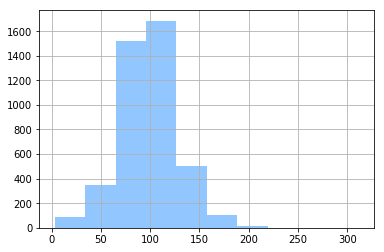

In [358]:
raw_data[raw_data.type == "Movie"].duration.hist()
print(f"{raw_data[raw_data.type == 'Movie'].duration.describe()}")

Longest and shortest movies.

In [359]:
raw_data[raw_data.duration > (99 + 4*28)]

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,season_count
show_id,,,,,,,,,,,
70090035,Movie,Jodhaa Akbar,Ashutosh Gowariker,"Hrithik Roshan, Aishwarya Rai Bachchan, Sonu S...",India,2008,TV-14,214.0,"Action & Adventure, Dramas, International Movies","In 16th-century India, what begins as a strate...",NaN
60020906,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...",India,2001,PG,224.0,"Dramas, International Movies, Music & Musicals","In 1890s India, an arrogant British commander ...",NaN
60002818,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,1964,TV-14,228.0,"Classic Movies, Dramas, International Movies",Returning home from war after being assumed de...,NaN
80988062,Movie,Black Mirror: Bandersnatch,N/A,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018,R,312.0,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",NaN


In [360]:
raw_data[raw_data.duration < (99 - 3*28)]

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,season_count
show_id,,,,,,,,,,,
81176188,Movie,American Factory: A Conversation with the Obamas,N/A,"President Barack Obama, Michelle Obama, Julia ...",N/A,2019,PG,10.0,Documentaries,Barack and Michelle Obama talk with directors ...,NaN
81211714,Movie,The Road to El Camino: Behind the Scenes of El...,N/A,N/A,United States,2019,TV-14,14.0,"Documentaries, International Movies","Aaron Paul, Vince Gilligan and other cast memb...",NaN
81020543,Movie,Calico Critters: A Town of Dreams,Momoko Kamiya,N/A,N/A,2017,PG,11.0,Children & Family Movies,Freya heads into town with her mother for a ve...,NaN
80114804,Movie,Cosmos Laundromat: First Cycle,Mathieu Auvray,"Pierre Bokma, Reinout Scholten van Aschat",Netherlands,2015,R,12.0,"Dramas, International Movies, Sci-Fi & Fantasy","Despondent on a desolate island, a suicidal sh...",NaN
70304298,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",N/A,United States,2014,PG,3.0,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",NaN
80149064,Movie,Buddy Thunderstruck: The Maybe Pile,Harry Chaskin,"Brian Atkinson, Ted Raimi, Harry Chaskin, Debi...",United States,2017,PG,14.0,Movies,Champion truck-racing dog Buddy and his best f...,NaN
80239831,Movie,Zion,Floyd Russ,Zion Clark,United States,2018,PG,12.0,"Documentaries, Sports Movies",Born without legs and stuck in foster care for...,NaN


Mean TV length is just under 2 seasons heavily left skewed. Dataset likely includes one-off short series.

count    1969.000000
mean        1.779584
std         1.624936
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: season_count, dtype: float64


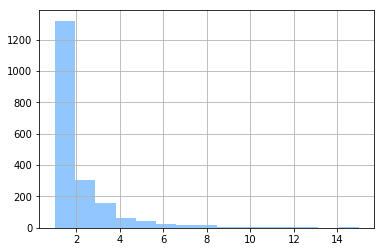

In [361]:
raw_data[raw_data.type == "TVShow"].season_count.hist(bins=15)
print(f"{raw_data[raw_data.type == 'TVShow'].season_count.describe()}")

TV Shows with at least 10 seasons

In [362]:
raw_data[raw_data.season_count >=10]

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,season_count
show_id,,,,,,,,,,,
70143825,TVShow,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...",United States,2019,TV-14,NaN,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",14.0
80244567,TVShow,Dad's Army,N/A,"Arthur Lowe, John Le Mesurier, Clive Dunn, Joh...",United Kingdom,1977,PG,NaN,"British TV Shows, Classic & Cult TV, TV Comedies",This beloved sitcom follows the unlikely heroe...,10.0
70153385,TVShow,Trailer Park Boys,N/A,"Mike Smith, John Paul Tremblay, Robb Wells, Jo...",Canada,2018,R,NaN,"Classic & Cult TV, Crime TV Shows, Internation...",Follow the booze-fueled misadventures of three...,12.0
70153390,TVShow,Criminal Minds,N/A,"Mandy Patinkin, Joe Mantegna, Thomas Gibson, S...","United States, Canada",2017,TV-14,NaN,"Crime TV Shows, TV Dramas, TV Mysteries",This intense police procedural follows a group...,12.0
70140391,TVShow,Grey's Anatomy,N/A,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2018,TV-14,NaN,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,15.0
70177040,TVShow,Danger Mouse: Classic Collection,N/A,"David Jason, Terry Scott, Edward Kelsey, Brian...",United Kingdom,1992,PG,NaN,"British TV Shows, Kids' TV, TV Comedies",Follow the adventures of superspy Danger Mouse...,10.0
70142386,TVShow,NCIS,N/A,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,2017,TV-14,NaN,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...,15.0
70152640,TVShow,Cheers,N/A,"Ted Danson, Rhea Perlman, George Wendt, John R...",United States,1992,PG,NaN,"Classic & Cult TV, TV Comedies","Sam Malone, an ex-baseball player turned bar o...",11.0
81008236,TVShow,COMEDIANS of the world,N/A,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,2019,R,NaN,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...,13.0


Get a list of all the unique ategories. There are many but also double counts with a space after the comma. We will consolidate these after we prepare the data fo the users. The detailed categories may be helpful to the users rating the movies.

In [363]:
categories = values_from_list_of_list(raw_data.listed_in)

unique_categories = list(set(categories))
print(f"There are {len(unique_categories)} unique categories.")

There are 72 unique categories.


Most common categories are listed below. Almost 2000 are international. 

In [364]:
Counter(categories).most_common(10)

[(' International Movies', 1842),
 ('Dramas', 1077),
 ('Comedies', 803),
 ('Documentaries', 644),
 ('Action & Adventure', 597),
 ('International TV Shows', 570),
 (' Dramas', 546),
 (' TV Dramas', 543),
 (' Independent Movies', 534),
 (' International TV Shows', 431)]

In [365]:
raw_data.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,season_count
show_id,,,,,,,,,,,
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,PG,90.0,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,NaN
80117401,Movie,Jandino: Whatever it Takes,N/A,Jandino Asporaat,United Kingdom,2016,R,94.0,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,NaN
70234439,TVShow,Transformers Prime,N/A,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,PG,NaN,Kids' TV,"With the help of three human allies, the Autob...",1.0
80058654,TVShow,Transformers: Robots in Disguise,N/A,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,PG,NaN,Kids' TV,When a prison ship crash unleashes hundreds of...,1.0
80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,99.0,Comedies,When nerdy high schooler Dani finally attracts...,NaN


# Prepare Data for Users to Rate

Filter the data for the users to see. Include only recent movies from English dominent countries. Remove irrelevant columns, rename the listed_in category and add a rating column (for the user to populate) and viewed (to keep track of which movies the user had a chance to rate).

In [366]:
data_4_users = raw_data.copy()

In [367]:
data_4_users = data_4_users[data_4_users.type == "Movie"]
data_4_users = data_4_users[data_4_users.country.isin(["United States", "Canada", "United Kingdom"])]
data_4_users = data_4_users[data_4_users.release_year>2000]

In [368]:
data_4_users.drop(["type", "country", "duration", "season_count", "rating"], axis=1, inplace=True)

In [369]:
data_4_users.rename(columns = {'listed_in':'catgeory'}, inplace = True)
data_4_users["rating"] = ""

Sample 500 movies, save to Excel file for each user to enter rankings.

In [370]:
user_list = ["Gabe", "Sam", "Shawna", "Luke", "Anthony", "Lindsay", "Nicole", "Blake", "Sean","Turco", "Benson", "Russel"]
#for user in user_list:
    #df = data_4_users.sample(500)
    #df["viewed"] = 1
    #df.to_csv(f"movie_ratings_{user}.csv", encoding="utf-8")

# Read User Ratings

In [371]:
def merge_user_rating(df):
    """Merges the user dataframe with user ranking for 500 movies to the original dataframe data_4_users 

    Args:
     df (pandas DataFrame): Data from User

    Returns:
     df: data_4_users with user ratings
    """
    df = data_4_users.merge(df[["show_id", "rating", "viewed"]], left_index=True, right_on="show_id", how='outer')
    df.set_index("show_id", inplace=True)
    df.drop("rating_x", axis=1, inplace=True)
    df.rename(columns = {"rating_y": "rating"}, inplace = True)
    df.viewed.fillna(0, inplace=True)
    return df

Read the Excel files with the users rating of 500 movies. Merge it with the original dataset the viewed column keeps track of the 500 movies the user had the opportunity to rate.

In [372]:
user_data = [merge_user_rating(pd.read_csv(f"movie_ratings_{user}.csv", header=0,encoding='latin1')) for user in user_list]

In [373]:
user_data[0]

,title,director,cast,release_year,catgeory,description,rating,viewed
show_id,,,,,,,,
80117401,Jandino: Whatever it Takes,N/A,Jandino Asporaat,2016,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,NaN,0.0
80125979,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",2017,Comedies,When nerdy high schooler Dani finally attracts...,NaN,1.0
80060297,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",2014,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...,NaN,0.0
70304988,Stonehearst Asylum,Brad Anderson,"Kate Beckinsale, Jim Sturgess, David Thewlis, ...",2014,"Horror Movies, Thrillers","In 1899, a young doctor arrives at an asylum f...",NaN,1.0
80057700,The Runner,Austin Stark,"Nicolas Cage, Sarah Paulson, Connie Nielsen, W...",2015,"Dramas, Independent Movies",A New Orleans politician finds his idealistic ...,NaN,0.0
80045922,6 Years,Hannah Fidell,"Taissa Farmiga, Ben Rosenfield, Lindsay Burdge...",2015,"Dramas, Independent Movies, Romantic Movies",As a volatile young couple who have been toget...,NaN,0.0
80239639,Sierra Burgess Is A Loser,Ian Samuels,"Shannon Purser, Kristine Froseth, RJ Cyler, No...",2018,"Comedies, Romantic Movies",A wrong-number text sparks a virtual romance b...,NaN,1.0
80058026,Hell and Back,"Tom Gianas, Ross R. Shuman","Nick Swardson, Mila Kunis, Bob Odenkirk, T.J. ...",2015,"Action & Adventure, Comedies, Independent Movies","When best friends break a blood oath, one of t...",NaN,1.0
80162141,Hard Tide,"Robert Osman, Nathanael Wiseman","Nathanael Wiseman, Mem Ferda, Alexandra Newick...",2015,"Dramas, Independent Movies",A drug dealer who's been emulating his father'...,NaN,0.0


In [374]:
user_data[1]

,title,director,cast,release_year,catgeory,description,rating,viewed
show_id,,,,,,,,
80117401,Jandino: Whatever it Takes,N/A,Jandino Asporaat,2016,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,NaN,0.0
80125979,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",2017,Comedies,When nerdy high schooler Dani finally attracts...,NaN,0.0
80060297,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",2014,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...,NaN,1.0
70304988,Stonehearst Asylum,Brad Anderson,"Kate Beckinsale, Jim Sturgess, David Thewlis, ...",2014,"Horror Movies, Thrillers","In 1899, a young doctor arrives at an asylum f...",NaN,0.0
80057700,The Runner,Austin Stark,"Nicolas Cage, Sarah Paulson, Connie Nielsen, W...",2015,"Dramas, Independent Movies",A New Orleans politician finds his idealistic ...,NaN,0.0
80045922,6 Years,Hannah Fidell,"Taissa Farmiga, Ben Rosenfield, Lindsay Burdge...",2015,"Dramas, Independent Movies, Romantic Movies",As a volatile young couple who have been toget...,NaN,0.0
80239639,Sierra Burgess Is A Loser,Ian Samuels,"Shannon Purser, Kristine Froseth, RJ Cyler, No...",2018,"Comedies, Romantic Movies",A wrong-number text sparks a virtual romance b...,NaN,0.0
80058026,Hell and Back,"Tom Gianas, Ross R. Shuman","Nick Swardson, Mila Kunis, Bob Odenkirk, T.J. ...",2015,"Action & Adventure, Comedies, Independent Movies","When best friends break a blood oath, one of t...",NaN,1.0
80162141,Hard Tide,"Robert Osman, Nathanael Wiseman","Nathanael Wiseman, Mem Ferda, Alexandra Newick...",2015,"Dramas, Independent Movies",A drug dealer who's been emulating his father'...,NaN,0.0


Display some statistics on each user's ratings

In [375]:
def get_user_rating_info(user, user_data):
    """Displays general rating information for a given user   

    Args:
     user (string): Name of the user
     user_data (pandas DataFrame): Data from User

    Returns:
     N/A
     prints summary information and displays a rating histogram 
    """
    print(f"{user}, you rated {len(user_data[user_data.rating.notnull()])} movies.")
    print(f"{user}, you viewed {len(user_data[user_data.viewed == 1])} movies.")
    print(f"{user}, your average rating is {user_data.rating.mean():.2f}.")
    print(f'Your rating frequency was: \n{user_data.groupby("rating")["title"].count()}')
    user_data.groupby("rating")["title"].count().plot(kind='bar')

Gabe, you rated 31 movies.
Gabe, you viewed 500 movies.
Gabe, your average rating is 3.52.
Your rating frequency was: 
rating
2.0     6
3.0    10
4.0     8
5.0     7
Name: title, dtype: int64


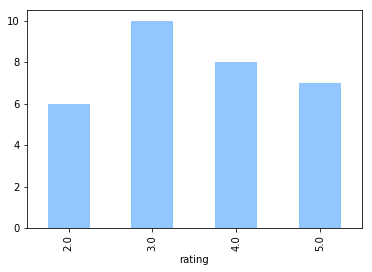

In [376]:
get_user_rating_info(user_list[0], user_data[0])

Group the categories into Anime, Children, Other, Comedies, Documentary, Drama, Horror, Musical, Romance, Sci-Fi, Sports, Action. Again, note the duplicated due to the comma and space.

In [377]:
set(values_from_list_of_list(raw_data[raw_data.type=="Movie"].listed_in))

{' Anime Features',
 ' Children & Family Movies',
 ' Classic Movies',
 ' Comedies',
 ' Cult Movies',
 ' Documentaries',
 ' Dramas',
 ' Faith & Spirituality',
 ' Horror Movies',
 ' Independent Movies',
 ' International Movies',
 ' LGBTQ Movies',
 ' Music & Musicals',
 ' Romantic Movies',
 ' Sci-Fi & Fantasy',
 ' Sports Movies',
 ' Stand-Up Comedy',
 ' Thrillers',
 'Action & Adventure',
 'Anime Features',
 'Children & Family Movies',
 'Classic Movies',
 'Comedies',
 'Cult Movies',
 'Documentaries',
 'Dramas',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'Movies',
 'Music & Musicals',
 'Romantic Movies',
 'Sci-Fi & Fantasy',
 'Sports Movies',
 'Stand-Up Comedy',
 'Thrillers'}

In [378]:
def replace_cat(categories):
    """Replaces the list of categories according to the dictionary   

    Args:
     categories (string): Categories

    Returns:
     categories (string): New categories
    """
    replace_cats = {'Anime Features': "Anime",
                    'Children & Family Movie': 'Children',
                    'Classic Movies': 'Other',
                    'Comedies': 'Comedies',
                    'Cult Movies': 'Other',
                    'Documentaries': 'Documentaries',
                    'Dramas': 'Dramas',
                    'Faith & Spirituality': 'Other',
                    'Horror Movies': 'Horror',
                    'Independent Movies': 'Other',
                    'International Movies': 'Other',
                    'LGBTQ Movies': 'Other',
                    'Music & Musicals': 'Musical',
                    'Romantic Movies': 'Romance',
                    'Sci-Fi & Fantasy': 'Sci-Fi',
                    'Sports Movies': 'Sports',
                    'Stand-Up Comedy': 'Comedies',
                    'Thrillers': 'Action',
                    'Action & Adventure': 'Action',
                    'Movies': 'Other',
                    }
    for key, value in replace_cats.items():
        categories = categories.replace(key, value)
    return categories

For each user, update the categories and then create a column for each with 1 if it appears and 0 otherwise.

In [379]:
for i, user in enumerate(user_data):
    user.catgeory = user.catgeory.apply(replace_cat)
    user_data[i] = pd.concat([user, user.catgeory.str.get_dummies(sep=', ')], axis=1)

In [380]:
user_data[0].head()

,title,director,cast,release_year,catgeory,description,rating,viewed,Action,Anime,Childrens,Comedies,Documentaries,Dramas,Horror,Musical,Other,Romance,Sci-Fi,Sports
show_id,,,,,,,,,,,,,,,,,,,,
80117401,Jandino: Whatever it Takes,N/A,Jandino Asporaat,2016,Comedies,Jandino Asporaat riffs on the challenges of ra...,NaN,0.0,0,0,0,1,0,0,0,0,0,0,0,0
80125979,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",2017,Comedies,When nerdy high schooler Dani finally attracts...,NaN,1.0,0,0,0,1,0,0,0,0,0,0,0,0
80060297,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",2014,"Comedies, Other, Romance",A filmmaker working on a documentary about lov...,NaN,0.0,0,0,0,1,0,0,0,0,1,1,0,0
70304988,Stonehearst Asylum,Brad Anderson,"Kate Beckinsale, Jim Sturgess, David Thewlis, ...",2014,"Horror, Action","In 1899, a young doctor arrives at an asylum f...",NaN,1.0,1,0,0,0,0,0,1,0,0,0,0,0
80057700,The Runner,Austin Stark,"Nicolas Cage, Sarah Paulson, Connie Nielsen, W...",2015,"Dramas, Other",A New Orleans politician finds his idealistic ...,NaN,0.0,0,0,0,0,0,1,0,0,1,0,0,0


# Suggest  Movies Based on Top Ranked Categories
Recommend movies based on user's top rated categories. 

Downside: too many movies, not tailored enough.

In [381]:
def get_top_cats(user_data):
    """Returns the top category(iess)   

    Args:
     user_data (Pandas DataFrame): User rated data

    Returns:
     top_categories (Pandas Index): Top categories where count = max
    """
    #First get a list of the top movies based on the max rating. Only incldude the category columns
    top_movies = user_data[user_data.rating == user_data.rating.max()].iloc[:,-12:]
    #Return the categories that appear the most in the top movies
    top_categories = top_movies.sum()[top_movies.sum() == top_movies.sum().max()].index

    
    return top_categories

Add a column top_cat to flag if movie contains a top category. Then recommend a top catogory movie that user has not viewed.

In [395]:
for i, data in enumerate(user_data):
    
    top_cats = get_top_cats(data)
    print(f"{user_list[i]}'s top movie categories are \n{top_cats}.")    
    
    user_data[i].insert(8,"top_cat",(sum([user_data[i][cat]==1 for cat in top_cats])>0)*1)
    recs = user_data[i][(user_data[i].top_cat==1) & (user_data[i].viewed==0)]
    print(f"There are {len(recs)} recommendations.")
    print(f"Recommendations\n:{recs.sample(5)['title']}")
    print("-"*20)
    print("-"*20)
    print("-"*20)

Gabe's top movie categories are 
Index(['Action', 'Comedies', 'Documentaries'], dtype='object').


ValueError: cannot insert top_cat, already exists

# Suggest Movies Based on Frequently Ranked Categories
Users typically rank movies they have watched and watch movies they may be interested in. 
Calculate the rating percentage by movie category and then recommend based on the highest percentages.
For example, someone who ranked a large percentage of sport films likely is interested in other sport films.

Downside: too many movies, not tailored enough.

In [384]:
movie_categories = user_data[0].columns[-12:]

In [385]:
def user_rank_percent_category(user_data, cat):
    """Returns the percentage of movies ranked for a given category   

    Args:
     user_data (Pandas DataFrame): User rated data
     cat (string): category
 
    Returns:
     (float): rank percentage for the given cateogry 
    """
    try:
        return round((len(user_data[(user_data.viewed == 1)& (user_data[cat] == 1)&~(user_data.rating.isnull())]))/(len(user_data[(user_data.viewed == 1) & (user_data[cat] == 1)])),2)
    except:
        return 0

In [386]:
user_rank_percent_category(user_data[0], "Comedies")

0.08

In [387]:
def plot_rank_freq(cats, user_rank_percentage):
    """Bar plot of category ranking frequency   

    Args:
     cats (list[string]): list of categories
     user_rank_percentage (list[float]): User rated data

    Returns:
     N/A
     Bar plot
    """
    plt.bar(np.arange(12), user_rank_percentage)
    plt.xticks(np.arange(12), cats, rotation=90)
    plt.ylabel("User Rated Percentage")
    plt.show()

For each user, for each category calculate the rating percentage. List top cateogories based on 75th perecentile. Add a column freq_cat to flag if a movie has a frequently rated cateogy. Recommend movies that have frequent categories and have not yet been viewed by the user.

Gabe's most freqently rated categories are 
['Action', 'Romance', 'Sci-Fi', 'Sports'].


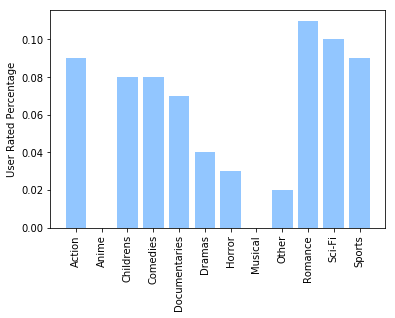

ValueError: cannot insert freq_cat, already exists

In [396]:
for i, data in enumerate(user_data):
    cats, user_rank_percentage = zip(*[(cat,user_rank_percent_category(data, cat)) for cat in movie_categories])
    
    top_categories=[cat for cat, percent in zip(cats,user_rank_percentage) if percent >=np.percentile(user_rank_percentage,75)]
    print(f"{user_list[i]}'s most freqently rated categories are \n{top_categories}.")
    plot_rank_freq(cats, user_rank_percentage)
    
    user_data[i].insert(8,"freq_cat",(sum([user_data[i][cat]==1 for cat in top_cats])>0)*1)
    recs = user_data[i][(user_data[i].freq_cat==1) & (user_data[i].viewed==0)]
    print(f"There are {len(recs)} recommendations.")
    print(f"Recommendations\n:{recs.sample(5)['title']}")
    print("-"*20)
    print("-"*20)
    print("-"*20)

# Suggest High Rated Movies Based on Population Average

Recommend movies based on all other user ratings. 

Downfall: users can have different taste. There are only a few users so we end up recommending based on a single rating.

Create a dataframe of consolidated rating data where each row is a user and each column is a movie.

In [389]:
full_df = pd.concat([data[["rating"]].T for data in user_data],
          ignore_index=True)
full_df=full_df.rename_axis('user_id').rename_axis('ratings', axis='columns')

In [390]:
full_df.mean().sort_values(ascending=False).head()

ratings
70051671    5.0
80145255    5.0
70169918    5.0
81121176    5.0
80219127    5.0
dtype: float64

For each user, recommend movies where the average overall rating is greater than the user average and the user has not yet viewed the movie.

In [397]:
for i, data in enumerate(user_data):
    
    print(f"{user_list[i]}, try these popular movies:")
    
    recs = user_data[i][(full_df.mean() > user_data[i]["rating"].mean()) & (user_data[i].viewed == 0)]
    print(f"There are {len(recs)} recommendations.")
    try:
        print(f"Recommendations\n:{recs.sample(5)['title']}")
    except:
        print()
    print("-"*20)
    print("-"*20)
    print("-"*20)

Gabe, try these popular movies:
There are 0 recommendations.

--------------------
--------------------
--------------------
Sam, try these popular movies:
There are 0 recommendations.

--------------------
--------------------
--------------------
Shawna, try these popular movies:
There are 0 recommendations.

--------------------
--------------------
--------------------
Luke, try these popular movies:
There are 0 recommendations.

--------------------
--------------------
--------------------
Anthony, try these popular movies:
There are 0 recommendations.

--------------------
--------------------
--------------------
Lindsay, try these popular movies:
There are 0 recommendations.

--------------------
--------------------
--------------------
Nicole, try these popular movies:
There are 0 recommendations.

--------------------
--------------------
--------------------
Blake, try these popular movies:
There are 0 recommendations.

--------------------
--------------------
-----------

# Suggest High Rated Movies from Similar Users

Suggest high rated movies from similar use based on similarity in movie ranking. Doing so could improve chances the user also enjoys the recomendation.

Downfall: users only ranked about 10%/50 movies

cosine_similarity does not like nan values. Replacing them with -1 does not impact the intention of the caluclation. Amplifies differences when one user has rated and other has not.

In [392]:
full_df.fillna(-1, inplace=True)

Calculate the similarity maxtrix (just for the 5 users who submitted ratings) which is a square matrix with a similarity 0<s<1 for each user and 1 across the diagonal.

In [393]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(full_df.iloc[[0,1,2,8,10]], full_df.iloc[[0,1,2,8,10]])

For each user, recommend top ranked movies from the top 3 similar users

In [394]:
for curr_user, sim in list(zip((0,1,2,8,10),cosine_sim)):#enumerate(cosine_sim):
    similarities = list(zip((0,1,2,8,10),sim))#list(enumerate(sim))
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    #print(similarities)
    

    #top 3 similar users not including user themselves

    temp = [user_data[similar_user][user_data[similar_user].rating == user_data[similar_user].rating.max()].index.values
                      for similar_user, sim2 in similarities[1:4]]
    
    movies = np.unique(np.array([movie for user in temp for movie in user]))
    recs = data_4_users.loc[movies]
    #for similar_user, sim2 in similarities[1:4]:
        #print(f"{curr_user}, {similar_user} : {sim2}")
    
        #print(f"{user_list[curr_user]}, try these movies rated highly from {user_list[similar_user]}:")
    
        #recs = user_data[similar_user][user_data[similar_user].rating == user_data[similar_user].rating.max()]
    print(f"{user_list[curr_user]}, here are some recommendations based on top rated movies by similar users.")
    print(f"There are {len(recs)} recommendations.")
    print(f"Recommendations\n:{recs['title']}")


Gabe, here are some recommendations based on top rated movies by similar users.
There are 6 recommendations.
Recommendations
:show_id
60027695         The Matrix Reloaded
70044605    The Pursuit of Happyness
70105599                    Coraline
70261674                  About Time
80219127      Avengers: Infinity War
80220813        Ant-Man and the Wasp
Name: title, dtype: object
Sam, here are some recommendations based on top rated movies by similar users.
There are 6 recommendations.
Recommendations
:show_id
60027695         The Matrix Reloaded
70044605    The Pursuit of Happyness
70105599                    Coraline
70261674                  About Time
80219127      Avengers: Infinity War
80220813        Ant-Man and the Wasp
Name: title, dtype: object
Shawna, here are some recommendations based on top rated movies by similar users.
There are 11 recommendations.
Recommendations
:show_id
60027695                             The Matrix Reloaded
70044605                        The Pursu